# G-Formula for time-varying causal inference.

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from causallib.time_varying.treament_strategy import CFBernoulli
from causallib.time_varying.GFormula import GFormula

/Users/julinamaharjan/opt/anaconda3/envs/j_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_obs = pd.read_csv('../../gnet_robust_rnn/easiest_sim_x2/data/easiest_gnet_data_obs_2x.csv') #, index_col=0)

In [3]:
df_obs_ids = df_obs.id.unique()
print(len(df_obs_ids))
df_obs = df_obs[:10000]
df_obs.head()

10000


,A,X,X2,time,id
0,0,-0.326233,1.329799,1,1
1,1,1.014886,1.272429,2,1
2,0,0.960009,0.414641,3,1
3,0,2.940409,-1.539950,4,1
4,1,3.767785,-0.928567,5,1


In [4]:
# df_obs.columns.tolist()
X = df_obs[['id', 'time', 'X', 'X2']]
a = df_obs[['A']]
# t=

In [5]:
covariate_models = {
    'X':  LinearRegression(),
    'X2': LinearRegression()
}
treatment_model = LogisticRegression(solver="liblinear")
treatment_strategy = CFBernoulli()

In [6]:
gFormula = GFormula(treatment_model=treatment_model,
                    covariate_models=covariate_models,
                    outcome_model=None,
                    refit_models=False,
                    random_state=None,
                    n_obsv=5,
                    n_sims=3,
                    n_steps=50,
                    mode='normal',
                    resid_val=None,
                    )

In [7]:
X.head()

,id,time,X,X2
0,1,1,-0.326233,1.329799
1,1,2,1.014886,1.272429
2,1,3,0.960009,0.414641
3,1,4,2.940409,-1.539950
4,1,5,3.767785,-0.928567


In [8]:
a.head()

,A
0,0
1,1
2,0
3,0
4,1


In [9]:
gFormula.fit(X, a, t=None, y=None)

/Users/julinamaharjan/opt/anaconda3/envs/j_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GFormula(all_cols=['prev_X', 'prev_X2', 'prev_A', 'X', 'X2', 'A'], covariate_cols=['X', 'X2'], covariate_models={'X': LinearRegression(), 'X2': LinearRegression()}, id_col=id, mode=normal, n_obsv=5, n_sims=3, n_steps=50, outcome_model=None, predict_proba=False, prev_covariate_cols=['prev_X', 'prev_X2'], prev_treatment_cols=['prev_A'], random_state=None, refit_models=False, resid_val=None, time_col=time, treatment_cols=['A'], treatment_model=LogisticRegression(solver='liblinear'), y_col=None)

In [10]:
a = df_obs[['id', 'A']]
est_outcome = gFormula.estimate_individual_outcome(
                                                    X,
                                                    a,
                                                    t=None,
                                                    y=None,
                                                    treatment_strategy=treatment_strategy
                                                )
est_outcome

,X,X2,A,id,time
0,5.015013,1.237745,0.0,1,0
1,4.489998,0.046997,0.0,1,1
2,4.897457,-0.726087,0.0,1,2
3,5.605628,0.502498,0.0,1,3
4,6.642785,0.153038,0.0,1,4
...,...,...,...,...,...
45,28.507843,-0.028307,0.0,200,45
46,29.534421,0.415332,0.0,200,46
47,29.495220,-0.421605,0.0,200,47
48,30.412107,0.227803,0.0,200,48


In [12]:
a = df_obs[['id', 'A']]
pop_outcome = gFormula.estimate_population_outcome(X, a, t=None, y=None, treatment_strategy=treatment_strategy )
pop_outcome

,X,X2,A,id
time,,,,
0,2.843048,0.032458,0.143333,100.5
1,3.309049,-0.032273,0.118333,100.5
2,3.884781,0.086990,0.101667,100.5
3,4.297806,-0.017611,0.093333,100.5
4,4.784557,-0.010879,0.088333,100.5
5,5.383385,0.029875,0.075000,100.5
6,5.952016,-0.031128,0.068333,100.5
7,6.443559,0.044599,0.046667,100.5
8,6.979461,0.069059,0.043333,100.5


In [12]:
# effect = gFormula.estimate_effect(pop_outcome[1], pop_outcome[0])

In [15]:
pop_outcome.reset_index(inplace=True)

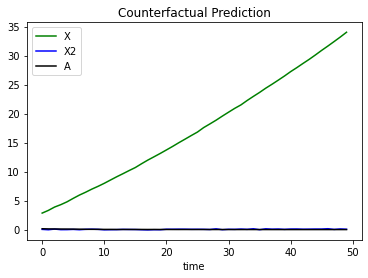

In [16]:
import matplotlib.pyplot as plt
#Get current axis
ax = plt.gca()

# line plot for math marks
pop_outcome.plot(kind = 'line',
        x = 'time',
        y = 'X',
        color = 'green',ax = ax)

# line plot for physics marks
pop_outcome.plot(kind = 'line',x = 'time',
        y = 'X2',
        color = 'blue',ax = ax)

# line plot for chemistry marks
pop_outcome.plot(kind = 'line',x = 'time',
        y = 'A',
        color = 'black',ax = ax)

# set the title
plt.title('Counterfactual Prediction')

# show the plot
plt.show()